<a href="https://colab.research.google.com/github/rick1177/-Examples/blob/master/01_cb_rate_exchange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Небольшое приложение для получения курса валют

## Объявление нужных библиотек

Первоначально выполняется импорт нужных библиотек и настройка отображения десятичных чисел

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## Получение курса валют на указанную дату

Обозначим в качестве переменной дату, которая интересует во всей сводке

In [ ]:
date = '14.06.2023'

После этого происходит получение данных с нужной страницы

In [ ]:
df = pd.read_html('https://cbr.ru/currency_base/daily/?UniDbQuery.Posted=True&UniDbQuery.To=' + date, thousands=None, decimal=",")

Из полученных данных извлекается нужная информация

In [ ]:
df = pd.concat([df[0]],ignore_index=True)
df

,Цифр. код,Букв. код,Единиц,Валюта,Курс
0,36,AUD,1,Австралийский доллар,56.5493
1,944,AZN,1,Азербайджанский манат,49.2003
2,51,AMD,100,Армянских драмов,21.6008
3,933,BYN,1,Белорусский рубль,28.0146
4,975,BGN,1,Болгарский лев,46.0373
5,986,BRL,1,Бразильский реал,17.1293
6,348,HUF,100,Венгерских форинтов,24.4234
7,410,KRW,1000,Вон Республики Корея,65.7861
8,704,VND,10000,Вьетнамских донгов,35.2928
9,344,HKD,1,Гонконгский доллар,10.6957


## Получаем справочник кодов валют ЦБ

### Получаем базовый справочник ЦБ

In [ ]:
currency_reference = pd.read_xml('https://cbr.ru/scripts/XML_val.asp?d=0', encoding="cp1251",)
currency_reference

,ID,Name,EngName,Nominal,ParentCode
0,R01010,Австралийский доллар,Australian Dollar,1,R01010
1,R01015,Австрийский шиллинг,Austrian Shilling,1000,R01015
2,R01020A,Азербайджанский манат,Azerbaijan Manat,1,R01020
3,R01035,Фунт стерлингов Соединенного королевства,British Pound Sterling,1,R01035
4,R01040F,Ангольская новая кванза,Angolan new Kwanza,100000,R01040
...,...,...,...,...,...
64,R01805,Югославский новый динар,Yugoslavian Dinar,1,R01804
65,R01805F,Сербский динар,Serbian Dinar,100,R01804
66,R01810,Южноафриканский рэнд,S.African Rand,10,R01810
67,R01815,Вон Республики Корея,South Korean Won,1000,R01815


## Получаем динамику любой валюты

Обозначение исходных данных

In [ ]:
currency_code = 'R01235'
date_from = '01.01.2022'
date_to = '28.06.2023'

Получаем динамику валюты

In [ ]:
exchange_rate_dynamics = pd.read_html('https://cbr.ru/currency_base/dynamics/?UniDbQuery.Posted=True&UniDbQuery.so=1&UniDbQuery.mode=1&UniDbQuery.date_req1=&UniDbQuery.date_req2=&UniDbQuery.VAL_NM_RQ=' + currency_code + '&UniDbQuery.From=' + date_from + '&UniDbQuery.To='+date_to, thousands=None, decimal=",")
exchange_rate_dynamics = pd.concat([exchange_rate_dynamics[0]],ignore_index=True)
headers = exchange_rate_dynamics.iloc[1]
exchange_rate_dynamics  = pd.DataFrame(exchange_rate_dynamics.values[2:], columns=headers)
exchange_rate_dynamics.columns=exchange_rate_dynamics.columns.str.strip()
exchange_rate_dynamics = exchange_rate_dynamics.sort_values(by = "Дата ▼",  )
exchange_rate_dynamics.rename(columns = {'Дата ▼':'Дата'}, inplace = True )
#exchange_rate_dynamics = exchange_rate_dynamics.astype({'Курс' : float, 'Дата':'datetime64[ns]'})
exchange_rate_dynamics['Курс'] = exchange_rate_dynamics['Курс'].astype(float)
exchange_rate_dynamics['Дата'] = pd.to_datetime(exchange_rate_dynamics['Дата'],  format='%d.%m.%Y', errors='coerce')
exchange_rate_dynamics.drop('Единиц',axis= 1 , inplace= True )
exchange_rate_dynamics = exchange_rate_dynamics.sort_values('Дата')
exchange_rate_dynamics

1,Дата,Курс
361,2022-01-11,75.1315
360,2022-01-12,74.8355
359,2022-01-13,74.5277
358,2022-01-14,74.5686
357,2022-01-15,75.7668
...,...,...
4,2023-06-22,84.2467
3,2023-06-23,83.6077
2,2023-06-24,84.0793
1,2023-06-27,84.6642


Строим график

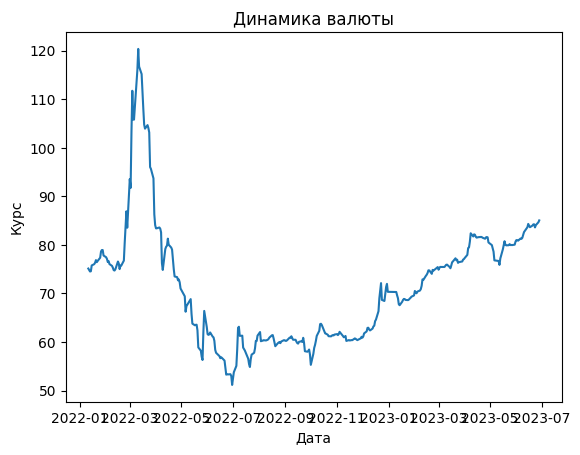

In [ ]:
plt.plot(exchange_rate_dynamics['Дата'], exchange_rate_dynamics['Курс'])
plt.xlabel('Дата')
plt.ylabel('Курс')
plt.title('Динамика валюты')
plt.show()

Строим второй вариант график

In [ ]:
fig = go.Figure(data=go.Scatter(x=exchange_rate_dynamics['Дата'], y=exchange_rate_dynamics['Курс'], mode='markers', line=dict(width=0.5, dash='dash')))
fig.update_layout(
    title='Динамика валюты',
    xaxis_title='Дата',
    yaxis_title='Значение',
    plot_bgcolor='rgba(0,0,0,0)',  # прозрачный фон графика
    paper_bgcolor='rgba(0,0,0,0)'  # прозрачный фон холста
)
fig.update_traces(marker=dict(size=5))
fig.show()

Ещё вариант график

In [ ]:
fig = go.Figure(data=go.Scatter(x=exchange_rate_dynamics['Дата'], y=exchange_rate_dynamics['Курс'], mode='markers',
                                marker=dict(size=8, color=df['Курс'], colorscale='Viridis', showscale=True),
                                hovertemplate='Дата: %{x}<br>Курс: %{y}'
                                ))
fig.update_layout(
    title='Динамика валюты',
    xaxis_title='Дата',
    yaxis_title='Курс',
    plot_bgcolor='rgba(0,0,0,0)',  # прозрачный фон графика
    paper_bgcolor='rgba(0,0,0,0)'  # прозрачный фон холста
)
fig.show()